**_The project aims to predict employee attrition in a company using machine learning techniques in order to identify employees who are likely to leave the company in the near future. By predicting and retaining these employees, the project aims to save a significant amount of money for the company. The analysis is based on the HR Employee Attrition dataset obtained from Kaggle_**

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import KMeansSMOTE,SVMSMOTE,BorderlineSMOTE,ADASYN
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier,BalancedBaggingClassifier
from imblearn.ensemble import EasyEnsembleClassifier,RUSBoostClassifier
import lightgbm as lgb
from sklearn.feature_selection import SelectKBest  #for fearure selection
from sklearn.feature_selection import mutual_info_classif ,chi2, f_classif    #for fearure selection
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE,RandomOverSampler

#Utilization of various classification algorithms:-

rf=RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split= 5,n_estimators= 100)
ad=AdaBoostClassifier(random_state=42)
nn = MLPClassifier(activation='tanh',alpha= 0.0001, random_state= 11, solver= 'sgd')
lg=lgb.LGBMClassifier(max_depth=5,random_state=42)
lr=LogisticRegression(random_state=42)
gb=GradientBoostingClassifier(random_state=42)
xgb=XGBClassifier(random_state=42)
svc= SVC(C= 0.1,kernel= 'linear',random_state=42)
dt=DecisionTreeClassifier(criterion='entropy',max_depth= 5,max_features= 'sqrt',min_samples_leaf=1,min_samples_split= 10,random_state=213)
BBC=BalancedBaggingClassifier(random_state=42)
BRFC=BalancedRandomForestClassifier(max_depth=5,random_state=42)
lst1=[ad,dt,gb,lr,rf,svc,xgb,lg,nn,BBC,BRFC]


*Dataset:*

`HR Employee Attrition dataset from Kaggle
Contains 1470 rows and 35 columns
Includes information about employees and their attrition status`

In [3]:
df=pd.read_csv("/content/drive/MyDrive/data_luminar/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [4]:
print(df.isna().sum(),df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

***Visualizing Class Imbalance:***

------------Visualizing the class Imbalance----------
Axes(0.125,0.11;0.775x0.77)


No     1233
Yes     237
Name: Attrition, dtype: int64

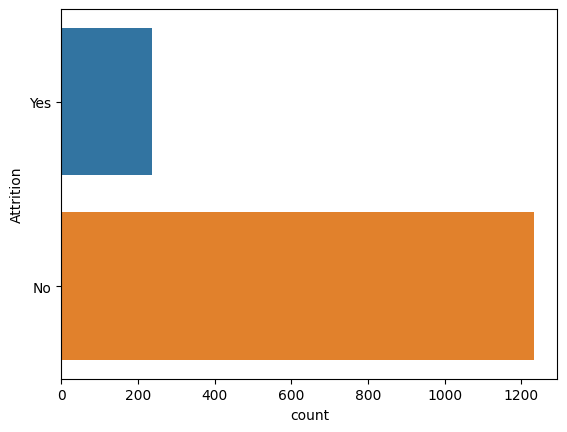

In [5]:
print("------------Visualizing the class Imbalance----------")
y=df["Attrition"]
print(sns.countplot(data=df,y="Attrition"))
df["Attrition"].value_counts()

Applied label encoding to categorical features using LabelEncoder

In [6]:
le=LabelEncoder()
lst=["Attrition",
"BusinessTravel",
"Department",
"EducationField",
"Gender",
"JobRole",
"MaritalStatus",
"Over18",
"OverTime"]
for i in lst:
  df[i]=le.fit_transform(df[i])
print(df["Attrition"].value_counts())
df.dtypes


0    1233
1     237
Name: Attrition, dtype: int64


Age                         int64
Attrition                   int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

Heatmap visualization to explore
potential relationships between \

---



----------finds potential relationships between variables and to understand the strength of these relationships.-----------


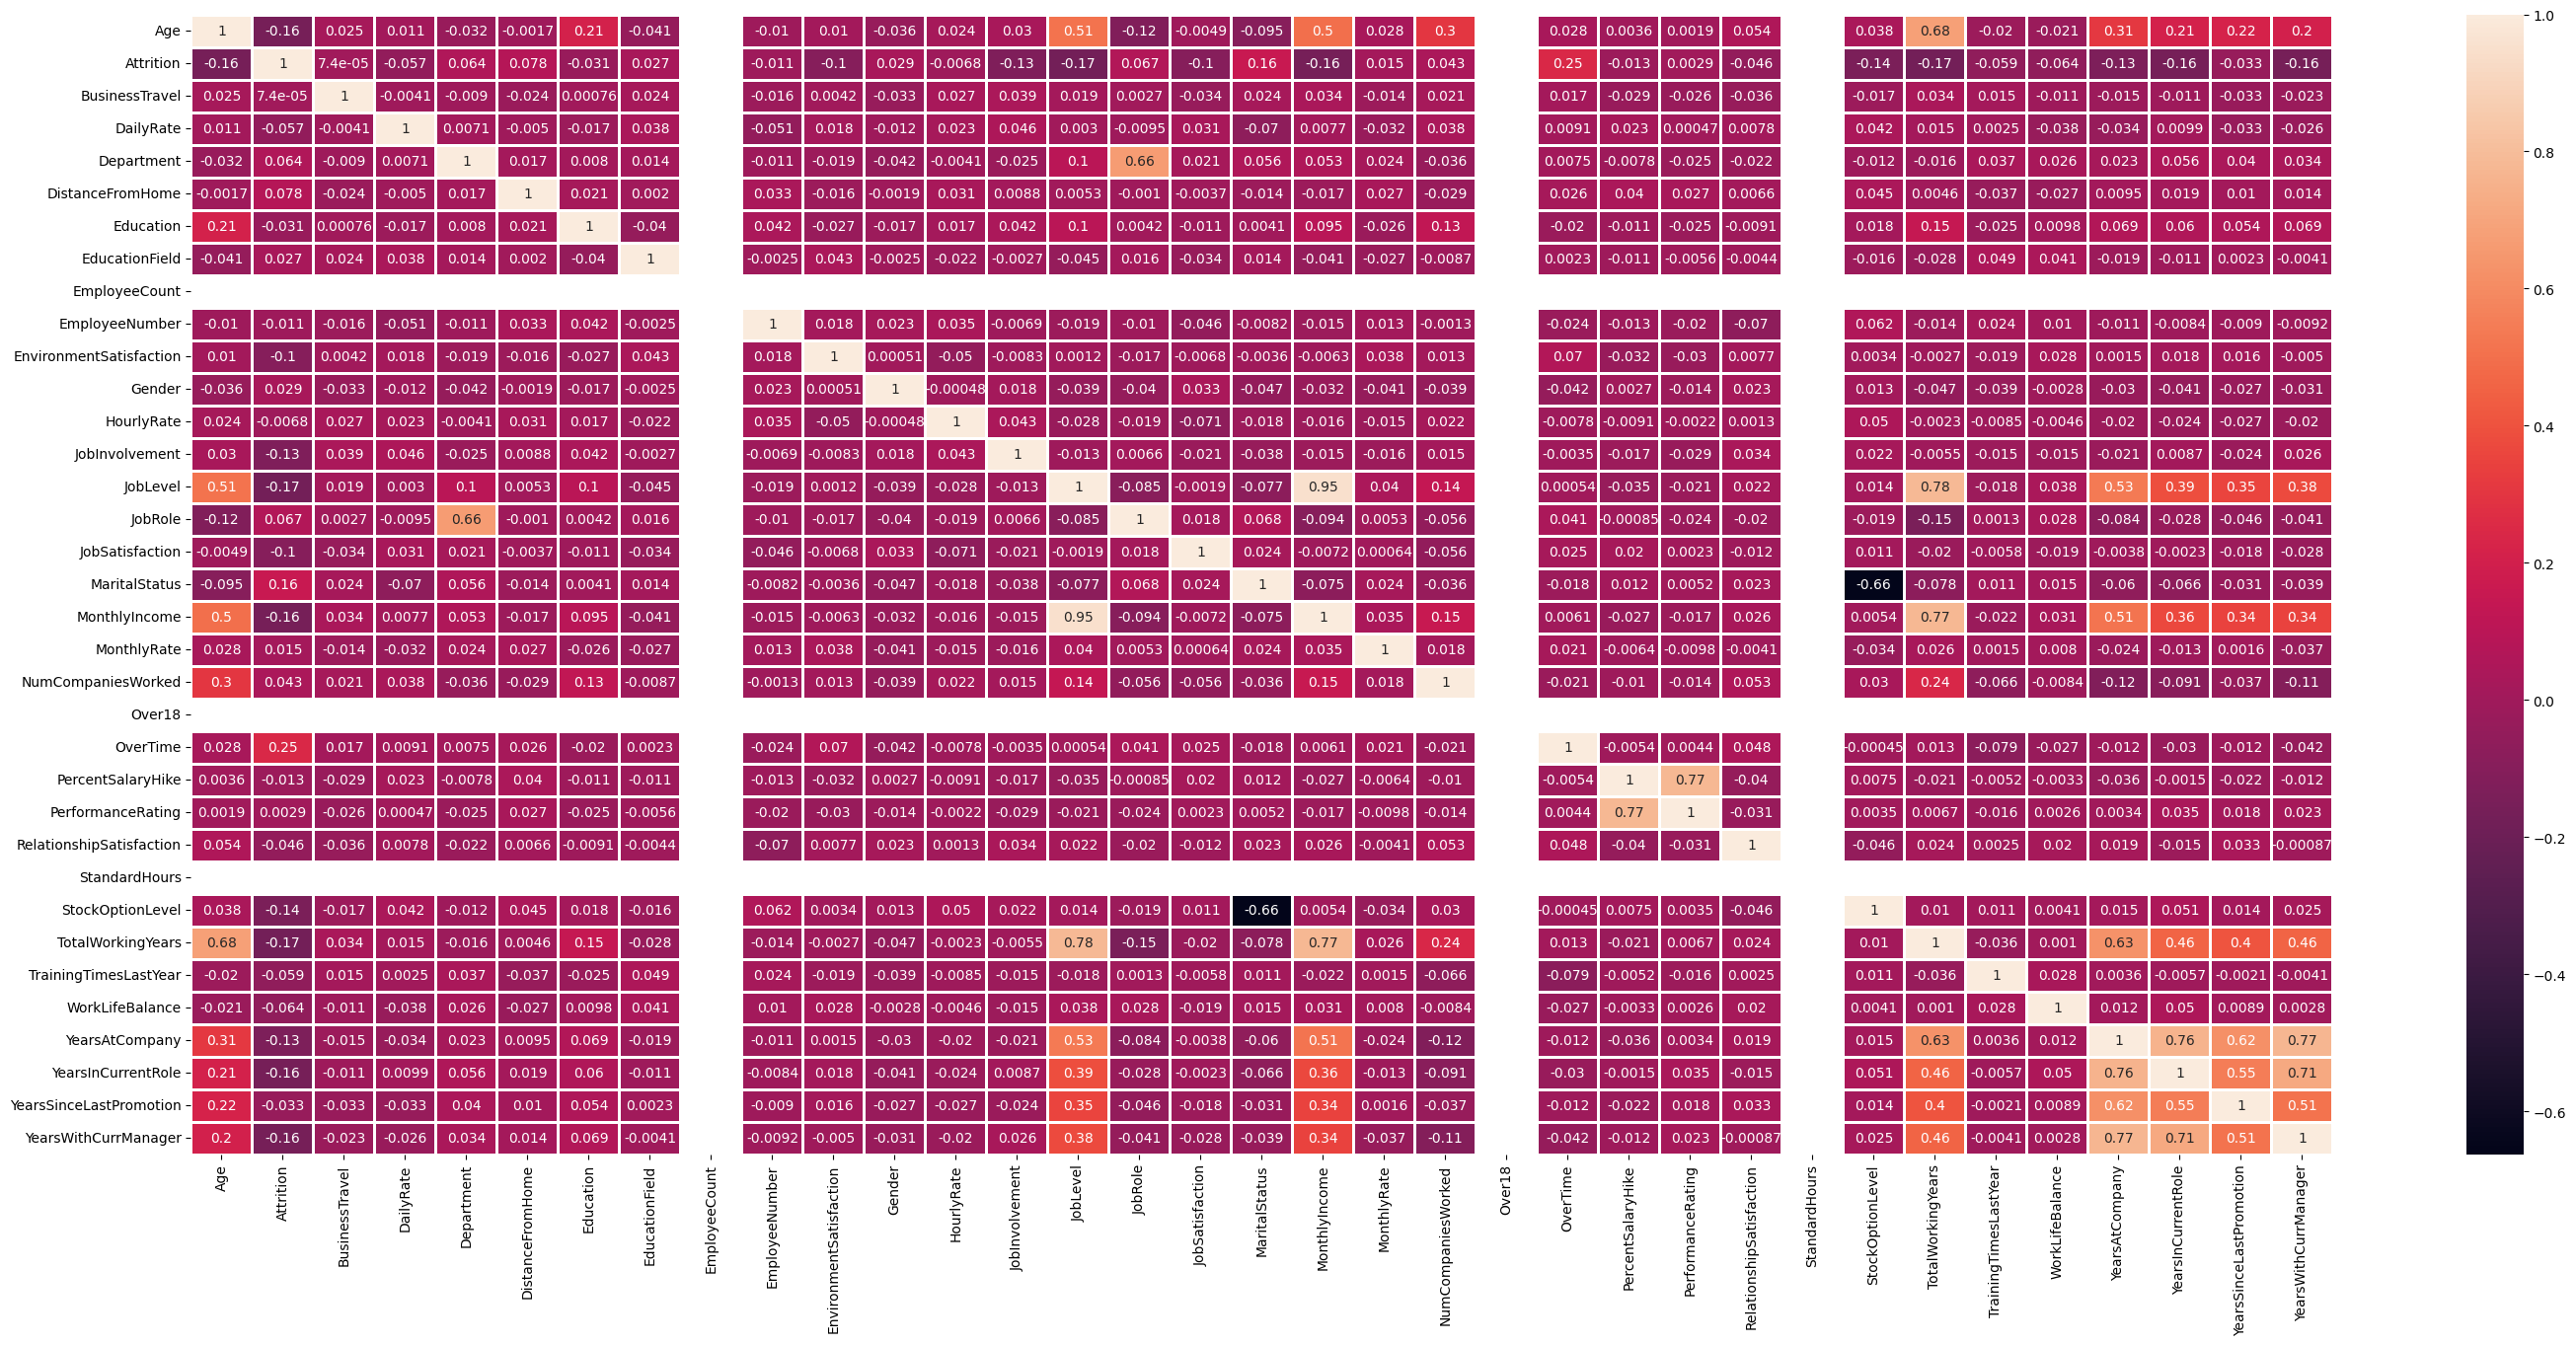

7.4e-05 = 7.4 x 10-5 = 0.000074.   BusinessTravel   have less effect on  Attirion of workers


In [7]:
import warnings
print("----------finds potential relationships between variables and to understand the strength of these relationships.-----------")
plt.figure(figsize=[35,15])
warnings.filterwarnings("ignore")
plt.show(sns.heatmap(df.corr(),annot=True,linewidth=1))
print("7.4e-05 = 7.4 x 10-5 = 0.000074.   BusinessTravel   have less effect on  Attirion of workers")

`Eliminating irrelevant columns based on insights obtained from a heatmap correlation analysis of the features.`

In [8]:
df=df.drop(["BusinessTravel","EmployeeCount", "StandardHours","Over18"],axis=1)
X=df.drop(df.columns[1], axis=1)
y=df["Attrition"]
X

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,2,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,5,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,7,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,2061,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,2062,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,2064,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,2065,4,1,63,...,3,4,0,17,3,2,9,6,0,8


**Outlier detection**

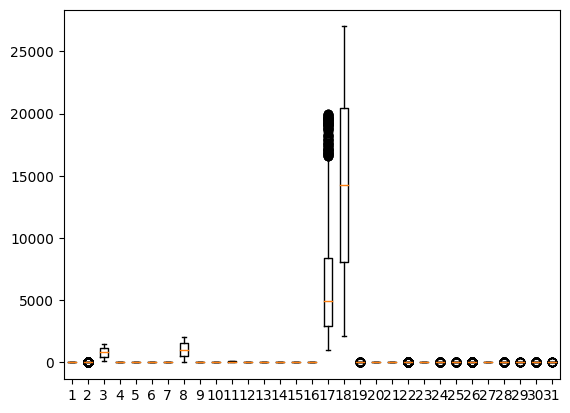

Original dataset shape: (1470, 31)
Dataset shape after removing outliers: (1470, 31)


In [9]:


# Create a box plot of the data
plt.boxplot(df)
plt.show()

# Calculate quartiles and IQR
Q1 = np.percentile(df, 25)
Q3 = np.percentile(df, 75)
IQR = Q3 - Q1

# Define the threshold for identifying outliers
threshold = 1.5

# Identify outliers based on the threshold
outliers = (df < Q1 - threshold * IQR) | (df > Q3 + threshold * IQR)

# Remove outliers from the dataset
data_without_outliers = df[~outliers]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", data_without_outliers.shape)


Data Scaling:

In [10]:
#StandardScaler  is giving comparitively high accuracy than MinMaxScaler
sc=StandardScaler()
X=sc.fit_transform(X)


In [11]:

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=548,test_size=0.3)
print(X_train.shape[0]," rows is present in X_train")

1029  rows is present in X_train


In [12]:
 ##HYPER PARAMETER TUNING
# from sklearn import feature_selection
# import warnings
# from sklearn.model_selection import GridSearchCV
# import warnings
# i=SVC()

# grid_vls={
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'degree': [2, 3, 4],
#     'gamma': ['scale', 'auto'],

#     'coef0': [0.0, 0.5, 1.0],

#     'tol': [1e-3, 1e-4, 1e-5],
#     'max_iter': [100, 500, 1000],
#     'decision_function_shape': ['ovr', 'ovo'],

#     'random_state': [42]


#      }
# grid=GridSearchCV(estimator=i, param_grid=grid_vls,scoring="accuracy", cv=5,refit=True,return_train_score=True)
# grid.fit(X_train, y_train)
# grid.best_params_

**using the output created by the chi square test, ANOVA F value test and Feature importance score of Random forest. I decided to drop certain features from the data set.**EmployeeCount : 0.0,
StandardHours : 0.0,
Over18 : 0.0

In [13]:
#  # #feature selection
#do this before label encoding  it wont work if data is converted into numpy array so do it before that

# # Perform Chi-square  test for feature selection
# chi2_selector = SelectKBest(score_func=chi2, k=5)  # Select top 5 features that are not important for predicting the target variable.
# X_chi2_selected = chi2_selector.fit_transform(X, y)
# chi2_scores = chi2_selector.scores_
# # chi2_feature_names = X.columns[chi2_scores.argsort()[-5:]]

# # Perform ANOVA F-value test for feature selection
# f_selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features that are not important for predicting the target variable
# X_f_selected = f_selector.fit_transform(X, y)
# f_scores = f_selector.scores_
# f_feature_names = X.columns[f_scores.argsort()[-5:]]


# print("Features selected using chi-square test:", chi2_feature_names.tolist())
# print("Features selected using ANOVA F-value test:", f_feature_names.tolist())
#                   #feature importance scores  RandomForestClassifier()
# rf=RandomForestClassifier()
# print('*'*20,rf,'*'*20)
# rf.fit(X_train,y_train)
# y_pred=rf.predict(X_test)
# feature_importances = rf.feature_importances_
# sorted_indices = feature_importances.argsort()[::-1]  # Sort feature indices in descending order of importance

# # Print feature importance scores
# print("Feature Importance Scores:")
# for feature_index in sorted_indices:
#    print(X.columns[feature_index], ":", feature_importances[feature_index])


NORMAL METHOD

******************** AdaBoostClassifier(random_state=42) ********************
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       385
           1       0.50      0.38      0.43        56

    accuracy                           0.87       441
   macro avg       0.71      0.66      0.68       441
weighted avg       0.86      0.87      0.87       441

AdaBoostClassifier(random_state=42) <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fa92086c7f0>
Accuracy: 0.873015873015873
________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, random_state=213) ********************
              precision    recall  f1-score   support

   

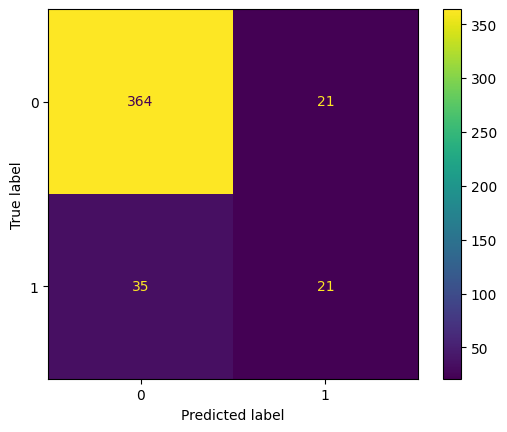

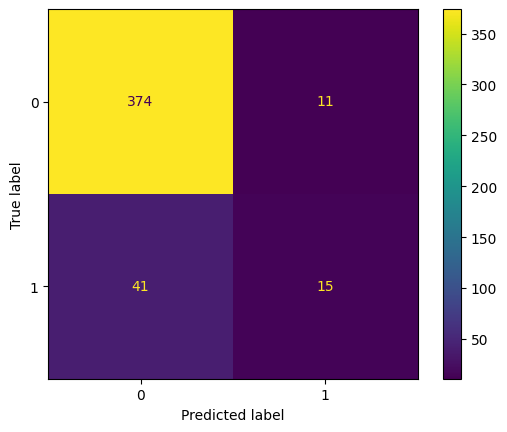

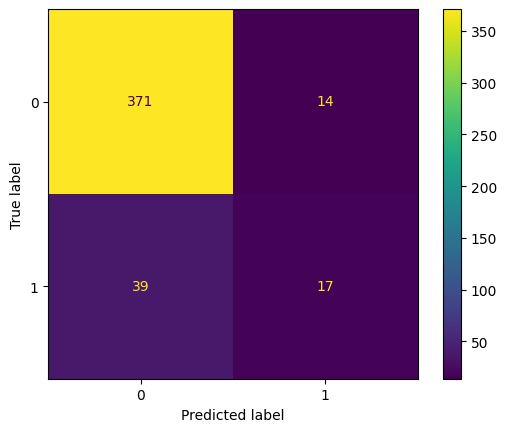

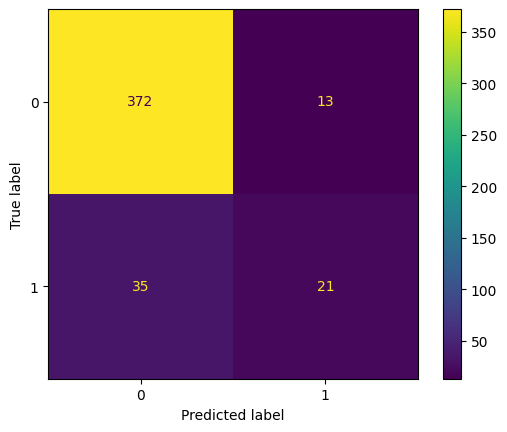

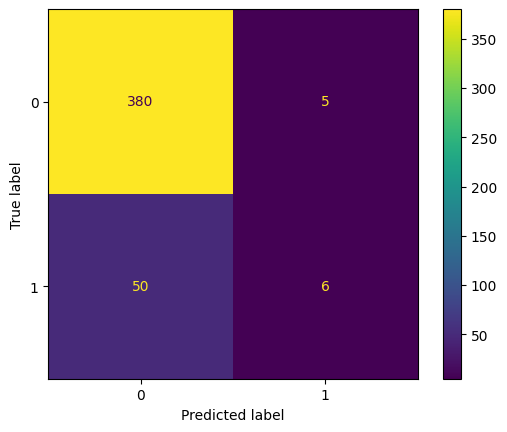

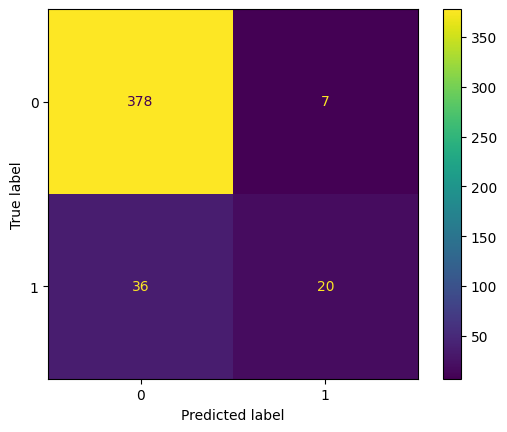

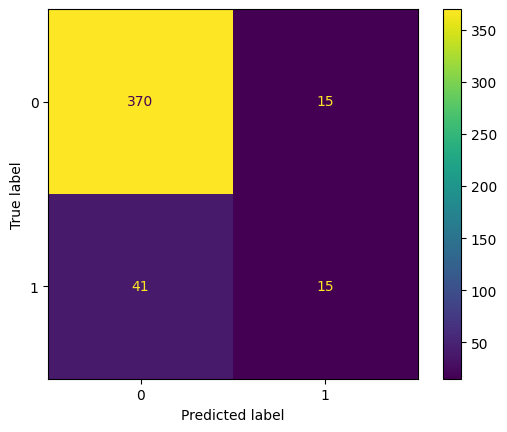

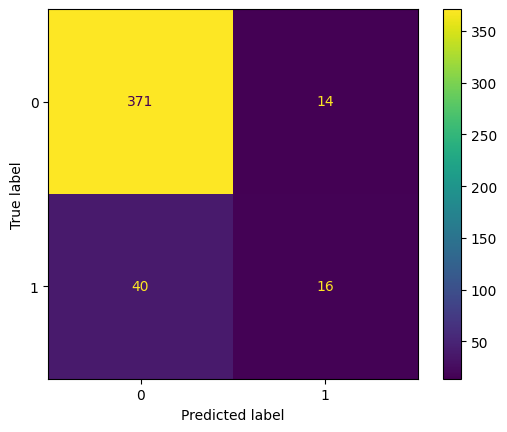

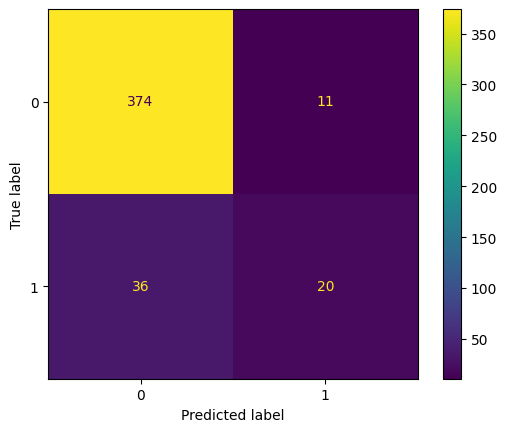

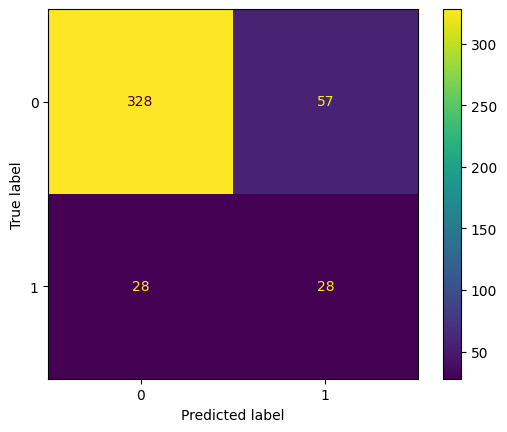

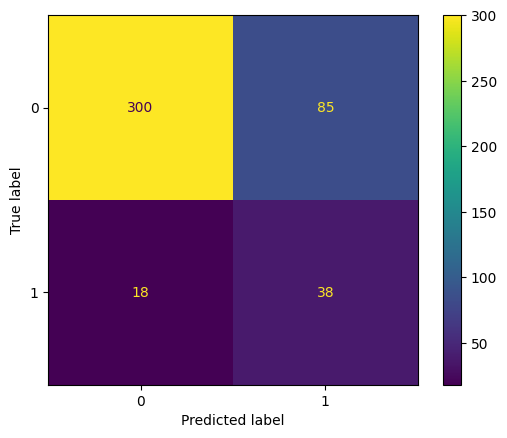

In [14]:



ac=[]
model=[]
for i in lst1:
  print('*'*20,i,'*'*20)
  i.fit(X_train,y_train)
  y_pred=i.predict(X_test)
  print(classification_report(y_test,y_pred))

  print(i,ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)
  print("Accuracy:", accuracy)
  ac.append(accuracy)
  model.append(i)

  print("_"*200)

In [15]:
# Finding best random state.
import random

random_numbers = random.sample(range(1,1000),50)

best_random_state=None
best_accuracy=0.0
for value in random_numbers:
  X_train1,X_test1,y_train1,y_test1=train_test_split(X,y,test_size=0.3,random_state=value)

  for clf in lst1:
      clf.fit(X_train,y_train)
      accuracy=clf.score(X_test,y_test)
  if accuracy> 0.9002267573696145:   #best_accuracy   740
      best_accuracy=accuracy
      best_random_state=value
      print("Best Random State:", best_random_state)
      print("Best Accuracy:", best_accuracy)

Synthetic Minority Over-sampling Technique (SMOTE)

In [16]:

sm=SMOTE()
X_train_o, y_train_o=sm.fit_resample(X_train,y_train)

acSMOTE=[]
modelSMOTE=[]
for up in lst1:
  print('*'*20,up,'*'*20)
  up.fit(X_train_o,y_train_o)
  y_pred=up.predict(X_test)

  print(classification_report(y_test,y_pred))
  print("_"*200)
  correct_predictions = (y_pred == y_test).sum()
  accuracy = correct_predictions / len(y_test)
  acSMOTE.append(accuracy)
  modelSMOTE.append(i)

******************** AdaBoostClassifier(random_state=42) ********************
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       385
           1       0.35      0.48      0.40        56

    accuracy                           0.82       441
   macro avg       0.63      0.67      0.65       441
weighted avg       0.85      0.82      0.83       441

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, random_state=213) ********************
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       385
           1       0.30      0.59      0.40        56

    accuracy                           0.77    

RandomOverSampler

In [17]:

oversampler = RandomOverSampler()
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

ac_ov=[]
model_ov=[]
for i in lst1:
  print('*'*20,i,'*'*20)
  i.fit(X_train_resampled,y_train_resampled)
  y_pred=i.predict(X_test)

  correct_predictions = (y_pred == y_test).sum()
  Accuracy = correct_predictions / len(y_test)
  ac_ov.append(Accuracy)
  model_ov.append(i)

  print(classification_report(y_test,y_pred))
  print("_"*200)


******************** AdaBoostClassifier(random_state=42) ********************
              precision    recall  f1-score   support

           0       0.94      0.78      0.86       385
           1       0.31      0.68      0.43        56

    accuracy                           0.77       441
   macro avg       0.63      0.73      0.64       441
weighted avg       0.86      0.77      0.80       441

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, random_state=213) ********************
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       385
           1       0.27      0.59      0.37        56

    accuracy                           0.75    

In [18]:
pca=PCA(n_components=3,random_state=3)
X_trainm=pca.fit_transform(X_train)
X_testm=pca.transform(X_test)
pca.explained_variance_ratio_


ac_pca=[]
model_pca=[]
for i in lst1:
  print('*'*20,i,'*'*20)
  i.fit(X_trainm,y_train)
  y_pred=i.predict(X_testm)

  correct_predictions = (y_pred == y_test).sum()
  Accuracy = correct_predictions / len(y_test)
  ac_pca.append(Accuracy)
  model_pca.append(i)

  print(classification_report(y_test,y_pred))
  print("_"*200)

******************** AdaBoostClassifier(random_state=42) ********************
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       385
           1       0.43      0.11      0.17        56

    accuracy                           0.87       441
   macro avg       0.66      0.54      0.55       441
weighted avg       0.83      0.87      0.83       441

________________________________________________________________________________________________________________________________________________________________________________________________________
******************** DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       min_samples_split=10, random_state=213) ********************
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       385
           1       0.25      0.05      0.09        56

    accuracy                           0.86    

Stacking

In [19]:

print("*"*20,"stacking method","*"*20)

lst2=[("knn",KNeighborsClassifier()),("lgbm",lgb.LGBMClassifier(max_depth=5)),("nb",GaussianNB()),("dt",DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',min_samples_split=10)),("gb",GradientBoostingClassifier()),("rf",RandomForestClassifier(max_depth=10, min_samples_split=5)),("lr",RandomForestClassifier()),("svc",SVC(C=0.1, kernel='linear')),("ad",AdaBoostClassifier())]
stc=StackingClassifier(estimators=lst2,final_estimator=RandomForestClassifier())
stc.fit(X_train,y_train)
y_pred_stc=stc.predict(X_test)
print(classification_report(y_test,y_pred_stc))
ac_s=[]

correct_predictions = (y_pred_stc == y_test).sum()
accuracy_stc = correct_predictions / len(y_test)

ac_s.append(accuracy_stc)
print("_"*200)
accuracy_stc

******************** stacking method ********************
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       385
           1       0.58      0.34      0.43        56

    accuracy                           0.88       441
   macro avg       0.74      0.65      0.68       441
weighted avg       0.87      0.88      0.87       441

________________________________________________________________________________________________________________________________________________________________________________________________________


0.8843537414965986

Highest accuracy in each method

In [20]:
print("Highest accuracy in each method :-")
highAC_in_normal = 0.0
for m in ac:
    if m > highAC_in_normal:
        highAC_in_normal = m


highAC_in_pca=0.0
for m in ac_pca:
    if m>highAC_in_pca:
      highAC_in_pca=m

highAC_in_RandomOverSampler=0.0
for m in ac_pca:
    if m>highAC_in_RandomOverSampler:
      highAC_in_RandomOverSampler=m


highAC_in_SMOTE=0.0
for m in acSMOTE:
    if m>highAC_in_SMOTE:
      highAC_in_SMOTE=m

highAC_lst=pd.DataFrame({"pca":highAC_in_pca,"SMOTE":highAC_in_SMOTE,"RandomOverSampling":highAC_in_RandomOverSampler,"normal":highAC_in_normal,"stacking--":accuracy_stc}, index=[0])
print(highAC_lst)

Highest accuracy in each method :-
        pca     SMOTE  RandomOverSampling    normal  stacking--
0  0.873016  0.888889            0.873016  0.902494    0.884354


# showing all accuracies

* Presented the highest accuracy achieved in each method

In [21]:

accuracy_normal = pd.Series(ac, name='accuracy')
algorithm_normal = pd.Series(model, name='algorithm')
normal = pd.concat([accuracy_normal, algorithm_normal], axis=1)

accuracy_RandomOverSampler = pd.Series(ac_ov, name='accuracy')
algorithm_RandomOverSampler = pd.Series(model_ov, name='algorithm')
RandomOverSampler = pd.concat([accuracy_RandomOverSampler, algorithm_RandomOverSampler], axis=1)

accuracy_pca = pd.Series(ac_pca, name='accuracy')
algorithm_pca = pd.Series(model_pca, name='algorithm')
pca = pd.concat([accuracy_pca, algorithm_pca], axis=1)

accuracy_smote = pd.Series(acSMOTE, name='accuracy')
algorithm_smote = pd.Series(modelSMOTE, name='algorithm')
smote = pd.concat([accuracy_smote, algorithm_smote], axis=1)

aggregate_df=pd.concat([normal,pca,RandomOverSampler,smote])
aggregate_df = aggregate_df.reset_index(drop=True)

aggregate_df.sort_values(by="accuracy", ascending=False, ignore_index= True, inplace=True)

aggregate_df_styled = (aggregate_df.style.background_gradient(subset=['accuracy'], cmap='RdYlGn', vmax=1.0, vmin=0.0))


aggregate_df_styled

print(" accuracy obtained through stacking",accuracy_stc)

aggregate_df_styled



 accuracy obtained through stacking 0.8843537414965986


,accuracy,algorithm
0,0.902494,"SVC(C=0.1, kernel='linear', random_state=42)"
1,0.893424,"MLPClassifier(activation='tanh', random_state=11, solver='sgd')"
2,0.891156,LogisticRegression(random_state=42)
3,0.888889,"BalancedRandomForestClassifier(max_depth=5, random_state=42)"
4,0.884354,"BalancedRandomForestClassifier(max_depth=5, random_state=42)"
5,0.882086,"DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt', min_samples_split=10, random_state=213)"
6,0.879819,GradientBoostingClassifier(random_state=42)
7,0.879819,"RandomForestClassifier(max_depth=10, min_samples_split=5)"
8,0.877551,"LGBMClassifier(max_depth=5, random_state=42)"
9,0.877551,"BalancedRandomForestClassifier(max_depth=5, random_state=42)"



* Results provide valuable insights for the HR department in identifying employees at risk of leaving the company